In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')


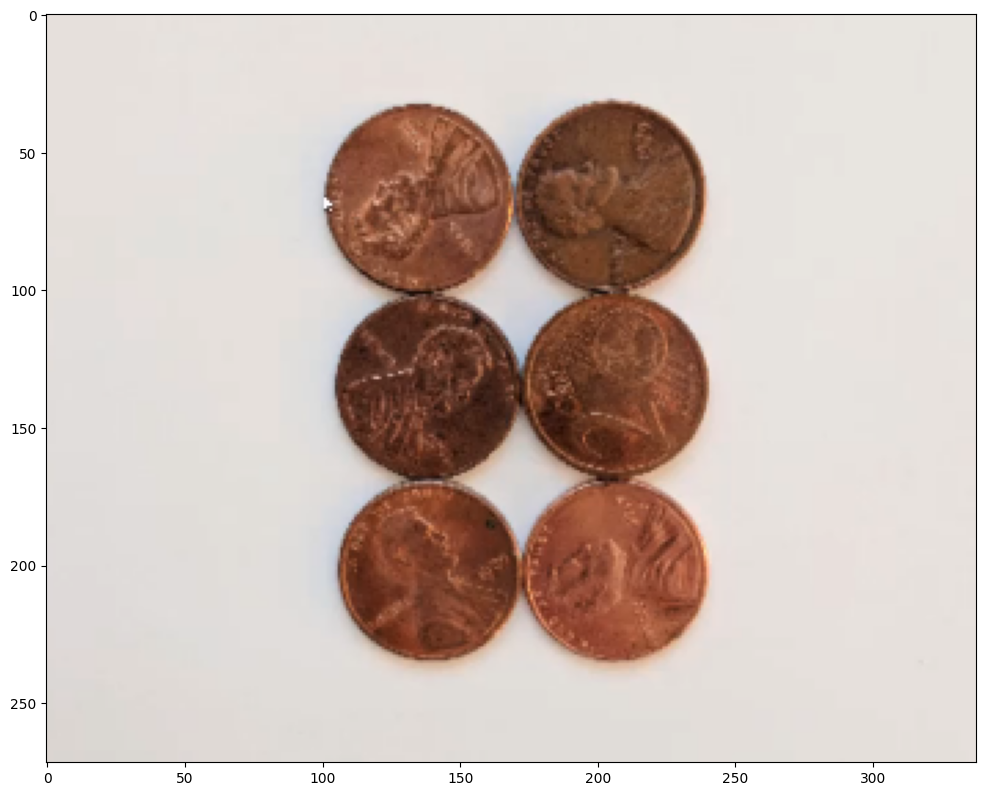

In [3]:
a = cv2.imread(r"C:\Work\Programing Language\Python\Libraries\OpenCV\data\img_10.png")
display(a)


# apply median Blur
# cvt to gray scale
# binary threshold
# find contour


In [4]:
a_blur = cv2.medianBlur(a,3)
a.shape

(272, 338, 3)

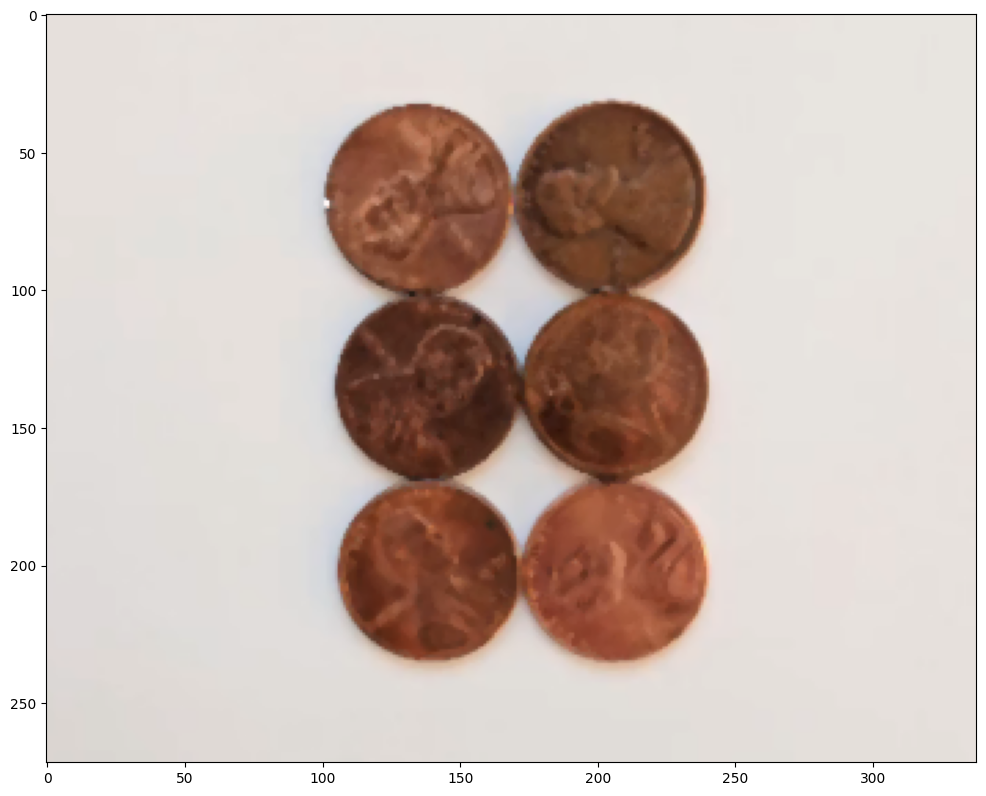

In [5]:
display(a_blur)

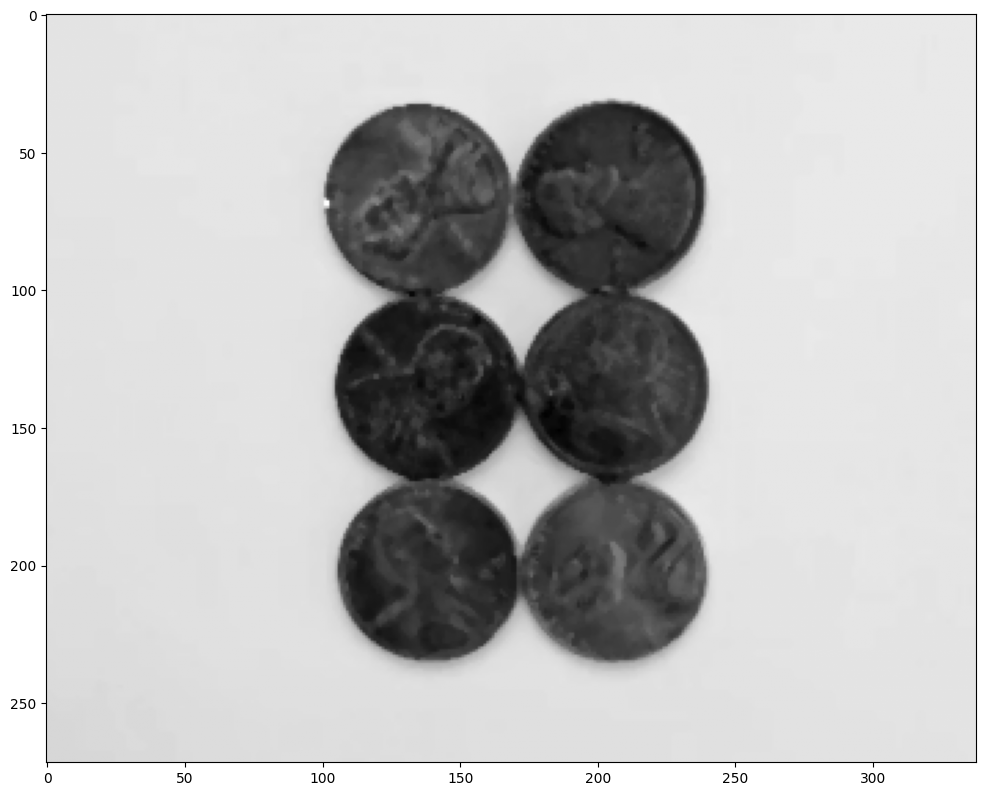

In [6]:
a_gray = cv2.cvtColor(a_blur,cv2.COLOR_BGR2GRAY)
display(a_gray)

# binary threshold


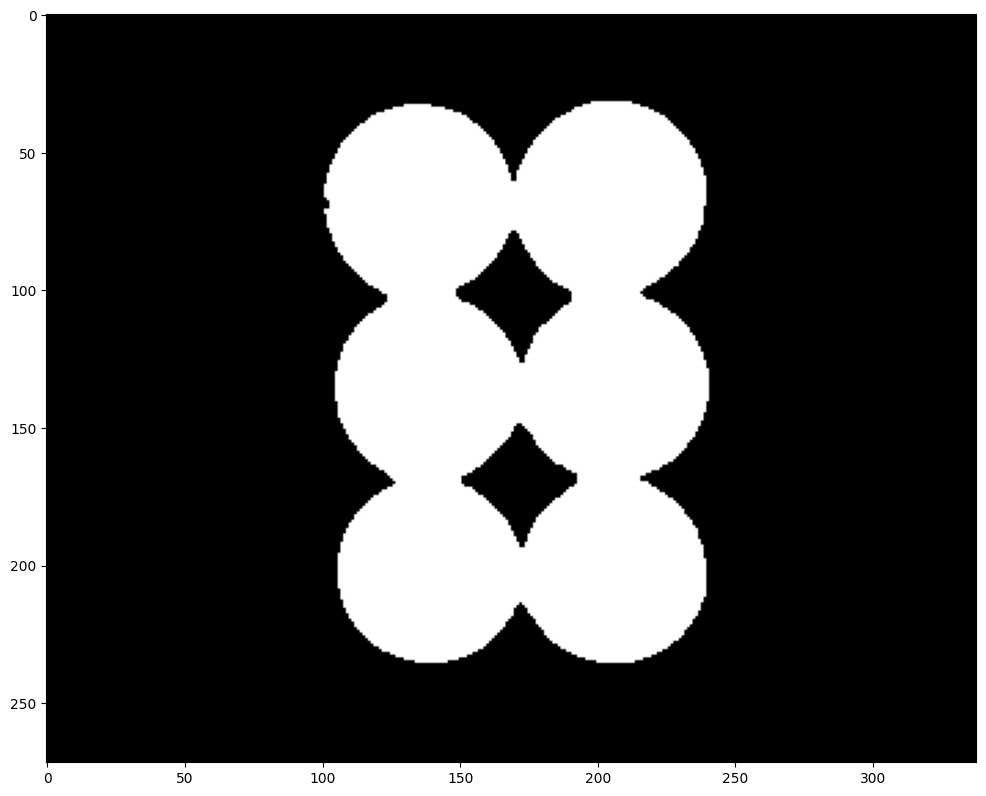

In [7]:
# ret,a_thresh = cv2.threshold(a_gray,160,255,cv2.THRESH_BINARY_INV)
# display(a_thresh)

# we notice that the threshold is not very accurate as all the coins are counted as one
### so we will now use `otsu` method to perform automatic thresholding

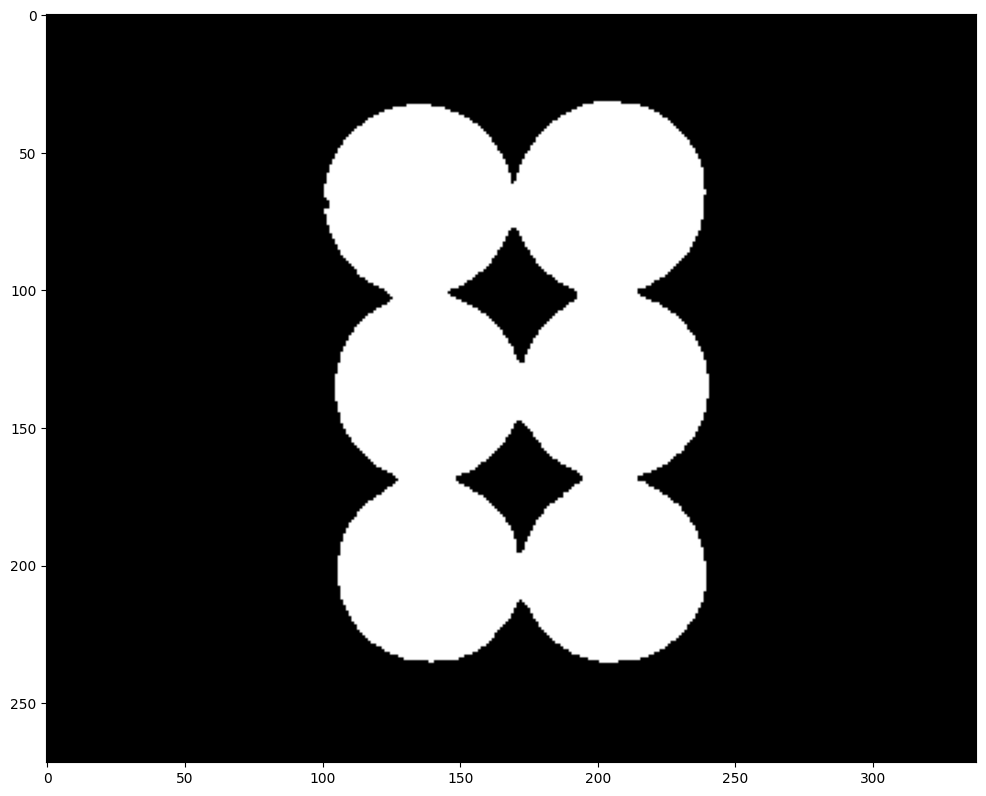

In [11]:
ret,a_thresh = cv2.threshold(a_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(a_thresh)

## NOISE REMOVAL

In [12]:
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

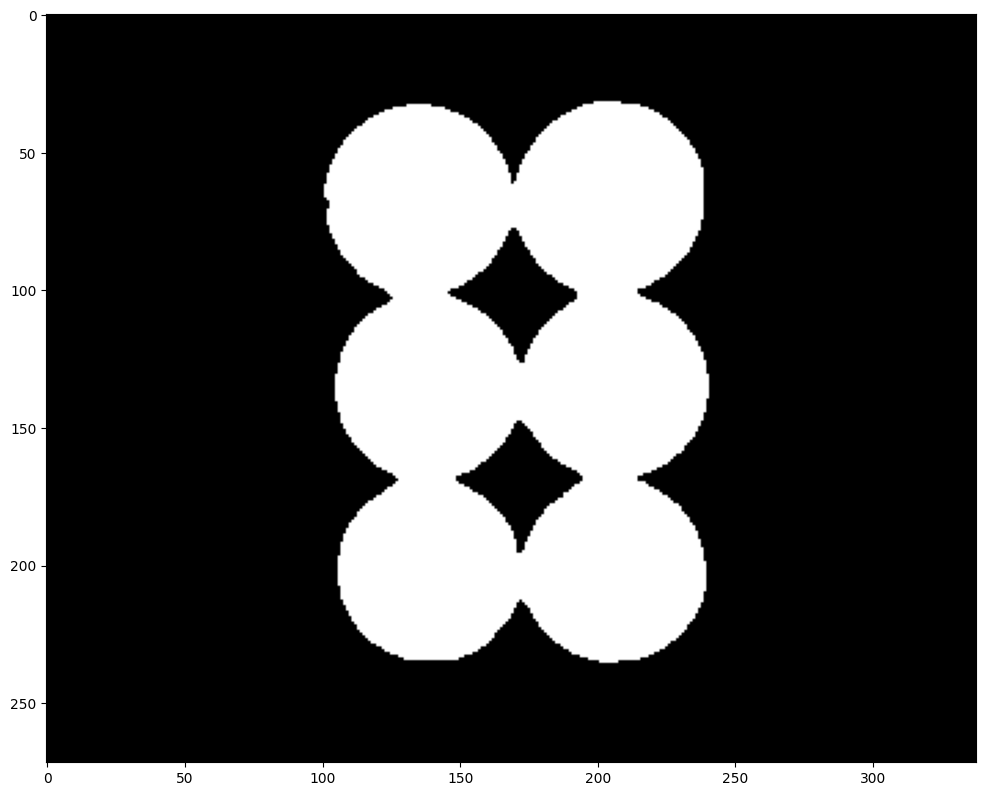

In [13]:
opening = cv2.morphologyEx(a_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

In [8]:
contours,hierarchy = cv2.findContours(a_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)


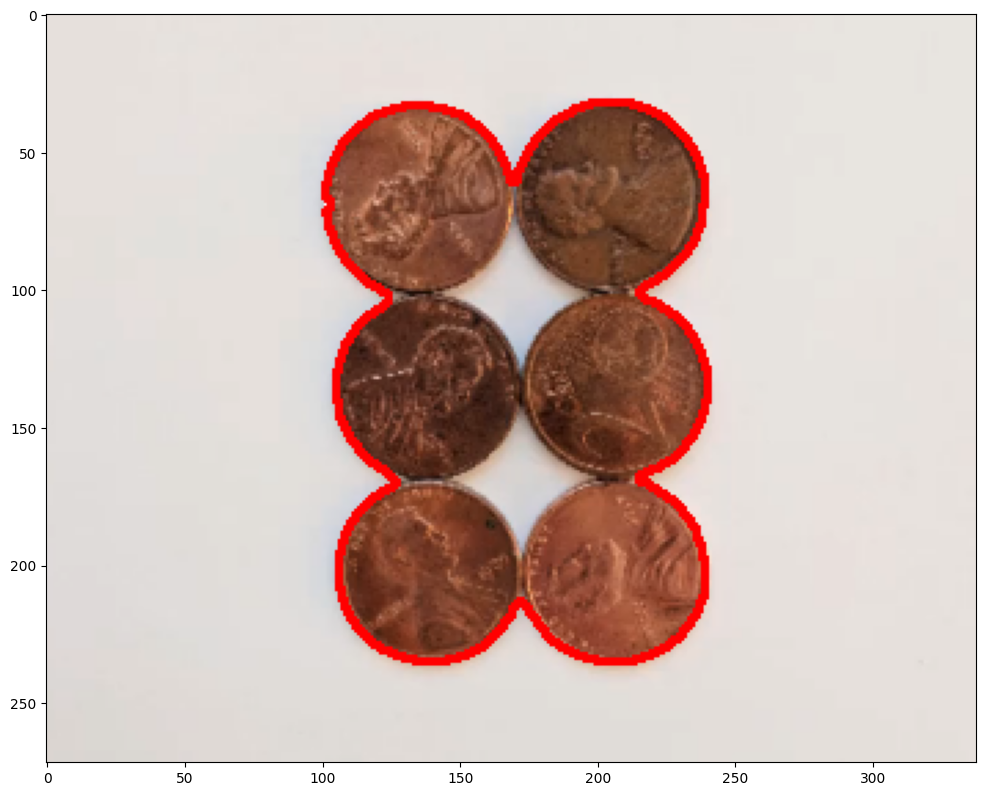

In [9]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(a,contours,i,(255,0,0),2)
display(a)